In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SAVE_DATA = False

### Read data

In [3]:
df = pd.read_excel("data.xlsx", index_col="exp")
df.head()

,m1,m2,m3,s1__autocorrelation__lag_8,s1__autocorrelation__lag_9,s1__autocorrelation__lag_7,s1__autocorrelation__lag_6,s1__autocorrelation__lag_5,s1__autocorrelation__lag_4,s1__longest_strike_above_mean,...,s1__ar_coefficient__coeff_3__k_10,s1__approximate_entropy__m_2__r_0.1,s1__lempel_ziv_complexity__bins_3,s1__partial_autocorrelation__lag_4,"s1__fft_coefficient__attr_""abs""__coeff_7","s1__agg_autocorrelation__f_agg_""var""__maxlag_40",s1__spkt_welch_density__coeff_2,y1,y2,y3
exp,,,,,,,,,,,,,,,,,,,,,
E001,150.223716,1176.177278,1.142097,-0.305434,-0.519191,-0.074829,0.159896,0.385790,0.590387,14,...,0.183996,0.158567,0.204152,-0.360084,0.293617,0.499488,5.886812e-08,55.460434,1.065917,114.578620
E002,102.534268,1483.654982,1.104716,-0.243785,-0.454262,-0.021002,0.202836,0.416423,0.608972,14,...,0.184370,0.144742,0.203008,-0.344364,6.142373,0.477743,3.643621e-06,50.640306,1.285666,124.651484
E003,119.890549,1254.897451,2.162773,-0.329006,-0.543405,-0.095913,0.142612,0.373002,0.582151,14,...,0.184036,0.144268,0.208163,-0.364611,26.783283,0.506435,1.590028e-04,50.832405,1.154859,57.018054
E004,162.830799,1302.043195,1.308283,-0.065152,-0.266498,0.138913,0.337187,0.521401,0.683873,16,...,0.187213,0.137326,0.193662,-0.355441,33.227591,0.460547,7.926165e-04,62.476545,1.025161,132.221218
E005,165.720956,1154.482314,1.566830,-0.304881,-0.518177,-0.074836,0.159321,0.384728,0.589003,14,...,0.183978,0.128546,0.192440,-0.357588,11.439470,0.497940,1.462831e-04,57.634438,1.043776,92.160269


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, E001 to E100
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   m1                                                  100 non-null    float64
 1   m2                                                  100 non-null    float64
 2   m3                                                  100 non-null    float64
 3   s1__autocorrelation__lag_8                          100 non-null    float64
 4   s1__autocorrelation__lag_9                          100 non-null    float64
 5   s1__autocorrelation__lag_7                          100 non-null    float64
 6   s1__autocorrelation__lag_6                          100 non-null    float64
 7   s1__autocorrelation__lag_5                          100 non-null    float64
 8   s1__autocorrelation__lag_4                          100 non-null    float64
 9   

### Extract data

In [5]:
_X = df.iloc[:, :-3]
_Y = df.iloc[:, -3:]
print(_X.shape)
print(_Y.shape)

(100, 47)
(100, 3)


### Split data

In [6]:
from sklearn.model_selection import train_test_split

_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.3, random_state=0
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)

(70, 47)
(30, 47)
(70, 3)
(30, 3)


### Scale data

In [7]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

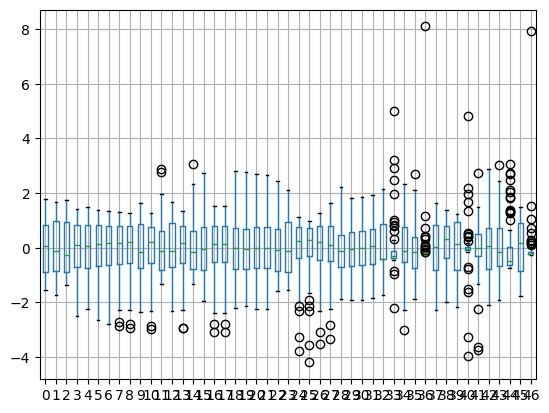

In [8]:
# _X_train.boxplot(figsize=(20,5))
pd.DataFrame(X_train).boxplot()
plt.show()

### Choose model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
# from sklearn.multioutput import MultiOutputRegressor

# reg = LinearRegression()

reg = SVR(C=1) # Will give error
# reg = MultiOutputRegressor(estimator=SVR(C=1))
# reg = MultiOutputRegressor(estimator=LinearRegression())

### Train model

In [10]:
reg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
reg.intercept_

array([ 1.98976988e-10, -2.98161680e-08,  1.60588648e-10])

### Predict results

In [11]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print(Y_train_pred.shape)
print(Y_test_pred.shape)

(70, 3)
(30, 3)


### Evaluate model performance

In [12]:
from datetime import datetime

dt = datetime.now().strftime("%Y-%m-%d_%H-%M")

In [13]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_percentage_error,
    r2_score,
)


def eval_perf(y_true, y_pred):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    return mse, mape, r2


def print_perf(data):
    for k, v in data.items():
        print(k, ":", v)


data_arr = []
for i in range(0, _Y.shape[1]):
    mse_train, mape_train, r2_train = eval_perf(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    mse_test, mape_test, r2_test = eval_perf(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )

    data = {
        "Y": f"Y-{i + 1}",
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAPE Train": mape_train,
        "MAPE Test": mape_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    }
    # print_perf(data)

    data_arr.append(data)

mse_train, mape_train, r2_train = eval_perf(y_true=Y_train, y_pred=Y_train_pred)
mse_test, mape_test, r2_test = eval_perf(y_true=Y_test, y_pred=Y_test_pred)
print_perf(data)

data = {
    "Y": "Y-All",
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAPE Train": mape_train,
    "MAPE Test": mape_test,
    "R2 Train": r2_train,
    "R2 Test": r2_test,
}
data_arr.append(data)
# print_perf(data)

df_eval = pd.DataFrame.from_dict(data_arr)
display(df_eval)

if SAVE_DATA:
    filename = f"eval_{dt}.xlsx"
    df_eval.to_excel(filename, index=False)

Y : Y-3
MSE Train : 2.081899774605619e-08
MSE Test : 8.085116369596622e-06
MAPE Train : 0.0007052553251752056
MAPE Test : 0.0028050930726271346
R2 Train : 0.9999999791810023
R2 Test : 0.9999909299792921


,Y,MSE Train,MSE Test,MAPE Train,MAPE Test,R2 Train,R2 Test
0,Y-1,3.196212e-08,0.000012,0.000436,0.002014,1.000000,0.999990
1,Y-2,2.066861e-03,0.292318,0.100566,0.279408,0.997933,0.636879
2,Y-3,2.081900e-08,0.000008,0.000705,0.002805,1.000000,0.999991
3,Y-All,6.889714e-04,0.097446,0.033902,0.094742,0.999311,0.878953


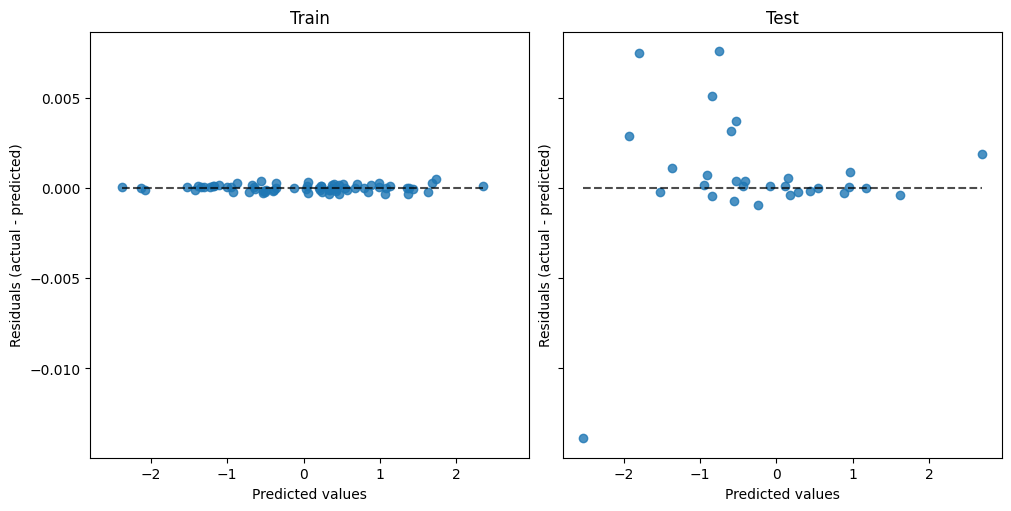

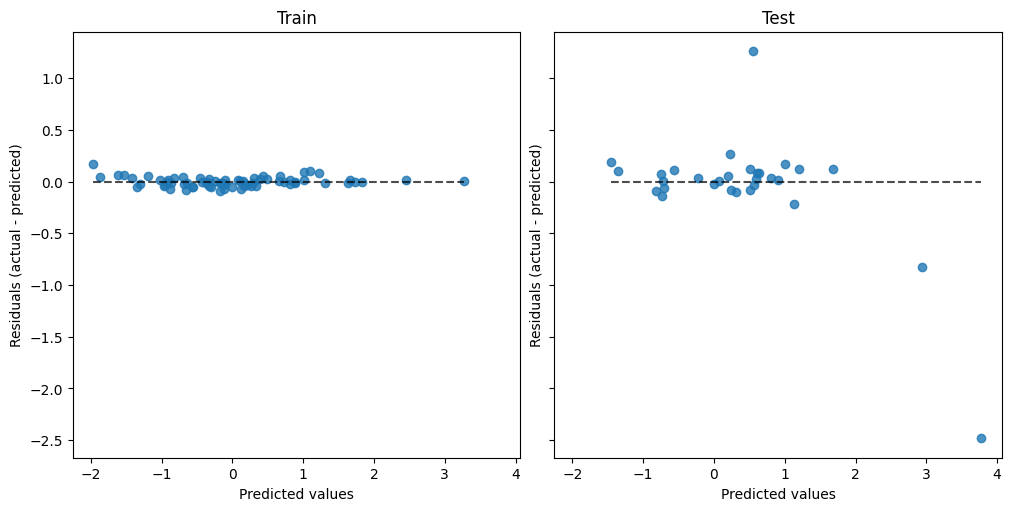

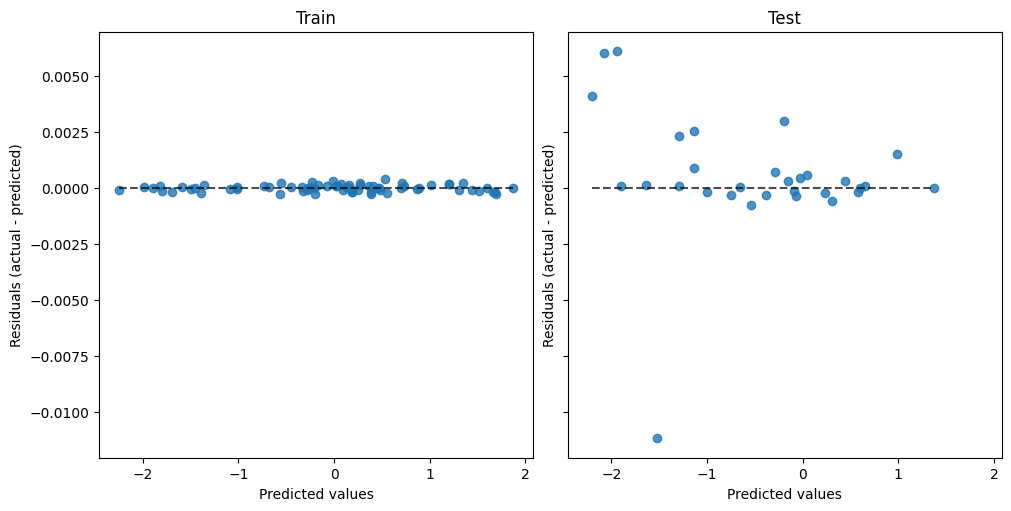

In [14]:
from sklearn.metrics import PredictionErrorDisplay

for i in range(0, _Y.shape[1]):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(10, 5),
        constrained_layout=True,
        sharex=True,
        sharey=True,
    )

    display_train = PredictionErrorDisplay(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_train = PredictionErrorDisplay(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )
    display_train.plot(ax=axes[1])
    axes[1].set_title("Test")

    if SAVE_DATA:
        filename = f"res_plot_{dt}_{i}.png"
        fig.savefig(filename, dpi=300)

    plt.show()

### Save data

In [15]:
import pickle

filename = f"data_{dt}.pkl"

data_save = {
    "model": reg,
    "desc": "This is the saved data",
    "Y_train": Y_train,
    "Y_train_pred": Y_train_pred,
    "Y_test": Y_test,
    "Y_test_Pred": Y_test_pred,
    "eval": df_eval,
}


# Save the model
if SAVE_DATA:
    with open(filename, "wb") as file:
        pickle.dump(data_save, file)

### Test loading data

In [16]:
if SAVE_DATA:
    with open(filename, "rb") as file:
        data_load = pickle.load(file)

    print(data_load)